In [1]:
from utility_bferror import *
from utility_bfcombiner import *

In [2]:
covar = np.load('../data/covar.npy')
covarTotal = np.sum(covar,axis=0)
beta0 = np.array([0.10883379, 0.10800187, 0.10689639,
                  0.11196685, 0.10982913, 0.10544397,
                  0.10505873, 0.10762646, 0.10785138,
                  0.11019370, 0.10963078, 0.10709402])

# 1. Uncertainty of Combined BR

In [3]:
# statisitcal
combiner = bfCombiner(covar[0], beta0)
sigma, corr = combiner.bfvar()
print(sigma/0.1080*100)

# total
combiner = bfCombiner(covarTotal, beta0)
sigma, corr = combiner.bfvar()
print(sigma/0.1080*100)

[0.26743873 0.23202033 0.57551262]
[1.45831047 1.52661916 4.4943933 ]


# 2. Plot Var Matrix

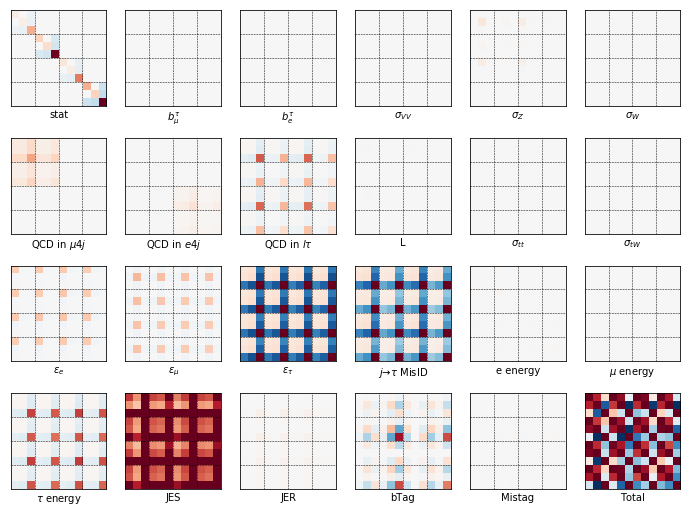

In [3]:
plt.figure(figsize=(12,9),facecolor='w')
showCovar(covar)
plt.savefig('../plots/covarMatrix.png',dpi=300)

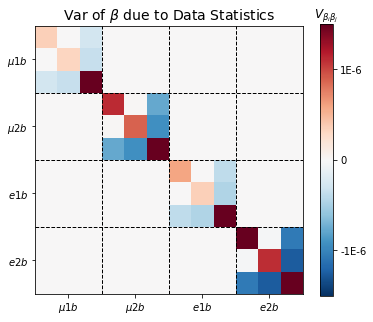

In [3]:
plt.figure(figsize=(6,5),facecolor='w')
mtx = covar[0] #* 10000
showSingleCovar(mtx,showCorr=False, norm= 1.5e-6, titleName=r'Var of $\beta$ due to Data Statistics')
cbar = plt.colorbar( ticks=[-1e-6, 0, 1e-6])
cbar.ax.set_title(r'$V_{\beta_i\beta_j}$')
cbar.ax.set_yticklabels(['-1E-6', '0', '1E-6'])

plt.savefig('../plots/covarData.png',dpi=300)

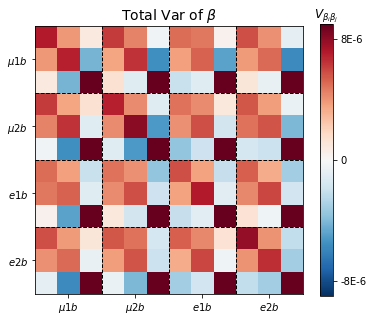

In [4]:
plt.figure(figsize=(6,5),facecolor='w')
mtx = np.sum(covar,axis=0) #* 10000
showSingleCovar(mtx,showCorr=False, norm= 9e-6, titleName=r'Total Var of $\beta$')
cbar = plt.colorbar( ticks=[-8e-6, 0, 8e-6])
cbar.ax.set_title(r'$V_{\beta_i\beta_j}$')
cbar.ax.set_yticklabels(['-8E-6', '0', '8E-6'])
plt.savefig('../plots/covarTotal.png',dpi=300)